In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.shape

(150, 6)

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Data Analysis 

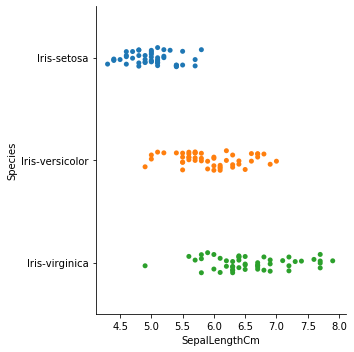

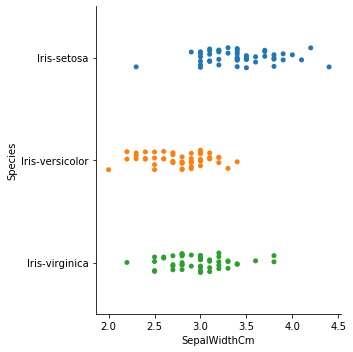

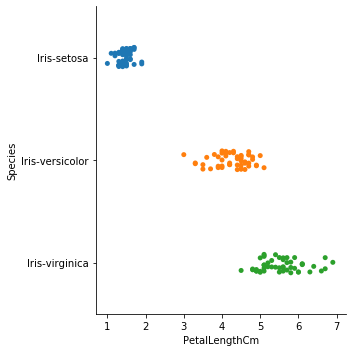

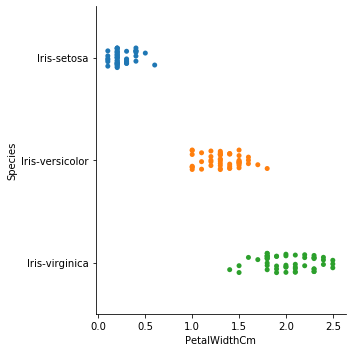

In [15]:
features = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]

for feature in features:
    sns.catplot(x = feature,y="Species",data=df)
    plt.show()

Applying K-means Clustering

In [17]:
X = df.iloc[:,[1,2,3,4]]

In [18]:
from sklearn.cluster import KMeans

score = []
for i in range(1,10):
    kmeans_model = KMeans(i,n_jobs=-1)
    kmeans_model.fit(X)
    score.append(kmeans_model.inertia_)

In [19]:
score

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.930963049671746,
 34.19698216257427,
 29.88917890442891,
 27.961553258145365]

Text(0.5, 1.0, 'Elbow Method to determine the optimal value of cluster size')

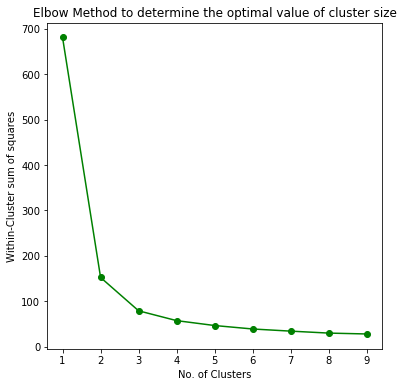

In [20]:
plt.figure(figsize=(6,6))
plt.plot(range(1,10),score,'go-')
plt.xlabel("No. of Clusters")
plt.ylabel("Within-Cluster sum of squares")
plt.title("Elbow Method to determine the optimal value of cluster size")

In [24]:
kmeans = KMeans(3,n_jobs=-1,init='k-means++', n_init=10, max_iter=300)

In [26]:
pred = kmeans.fit_predict(X)

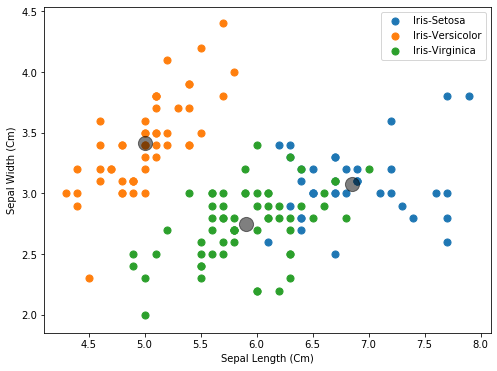

In [27]:

plt.figure(figsize=(8,6))


plt.scatter(X[pred==0].iloc[:,0], X[pred==0].iloc[:,1], s = 50, label = 'Iris-Setosa')
plt.scatter(X[pred==1].iloc[:,0], X[pred==1].iloc[:,1], s = 50, label = 'Iris-Versicolor')
plt.scatter(X[pred==2].iloc[:,0], X[pred==2].iloc[:,1], s = 50, label = 'Iris-Virginica')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel("Sepal Length (Cm)")
plt.ylabel("Sepal Width (Cm)")
plt.legend()